# Explore data augmentations

This notebook will be used to test different data augmentation strategies. In your config file, you can modify the augmentations by adding `data_augmentation_options`. For example, I would like to add a random RGB to gray transform with a probability of 0.2:
```
data_augmentation_options {
    random_rgb_to_gray {
    probability: 0.2
    }
```

A complete list of augmentation is provided the [`preprocessor.proto` file of the Tf Object Detection API](https://github.com/tensorflow/models/blob/master/research/object_detection/protos/preprocessor.proto).

### Helper functions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
def recenter_image(image):
    # ssd preprocessing
    image += [123.68, 116.779, 103.939]
    return image

def display_instances(image, bboxes, classes):
    image = recenter_image(image)
    w, h, _ = image.shape
    # resize the bboxes
    bboxes[:, [0, 2]] *= w
    bboxes[:, [1, 3]] *= h
    
    f, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(image.astype(np.uint8))
    for bb, cl in zip(bboxes, classes):
        y1, x1, y2, x2 = bb
        rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', edgecolor='r', linewidth=2)
        ax.add_patch(rec)
    plt.show()

def display_batch(batch):
    # get images, bboxes and classes
    batched_images = batch[0]['image'].numpy()
    batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
    batched_classes = batch[1]['groundtruth_classes'].numpy()
    num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
    batch_size = batched_images.shape[0]
    for idx in range(batch_size):
        display_instances(batched_images[idx, ...], 
                          batched_bboxes[idx, :num_bboxes[idx], :],
                          batched_classes[idx, ...])

### Display augmentations

In [3]:
from utils import get_train_input

In [6]:
train_dataset = get_train_input("pipeline_new.config")

INFO:tensorflow:Reading unweighted datasets: ['/data/train/segment-11454085070345530663_1905_000_1925_000_with_camera_labels.tfrecord', '/data/train/segment-10927752430968246422_4940_000_4960_000_with_camera_labels.tfrecord', '/data/train/segment-10526338824408452410_5714_660_5734_660_with_camera_labels.tfrecord', '/data/train/segment-10940952441434390507_1888_710_1908_710_with_camera_labels.tfrecord', '/data/train/segment-11236550977973464715_3620_000_3640_000_with_camera_labels.tfrecord', '/data/train/segment-10275144660749673822_5755_561_5775_561_with_camera_labels.tfrecord', '/data/train/segment-10750135302241325253_180_000_200_000_with_camera_labels.tfrecord', '/data/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord', '/data/train/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord', '/data/train/segment-11126313430116606120_1439_990_1459_990_with_camera_labels.tfrecord', '/data/train/segment-10023947602400723454_1120_000_1140_

INFO:tensorflow:Number of filenames to read: 60
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
Use `tf.cast` instead.


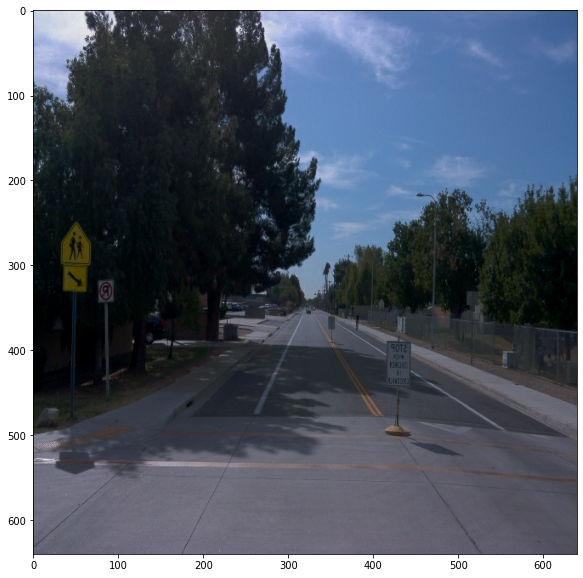

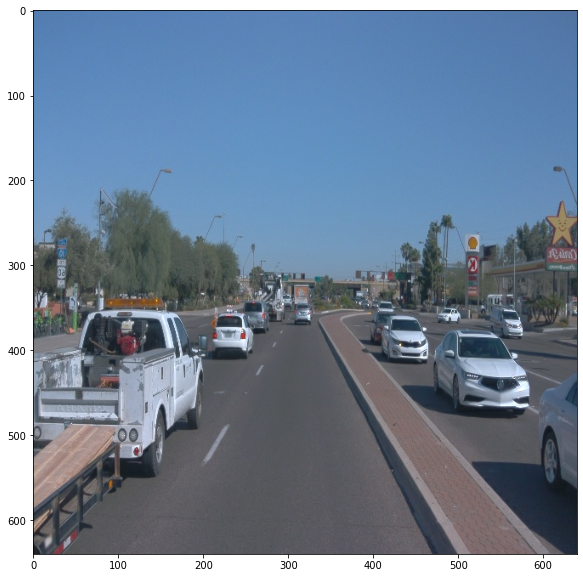

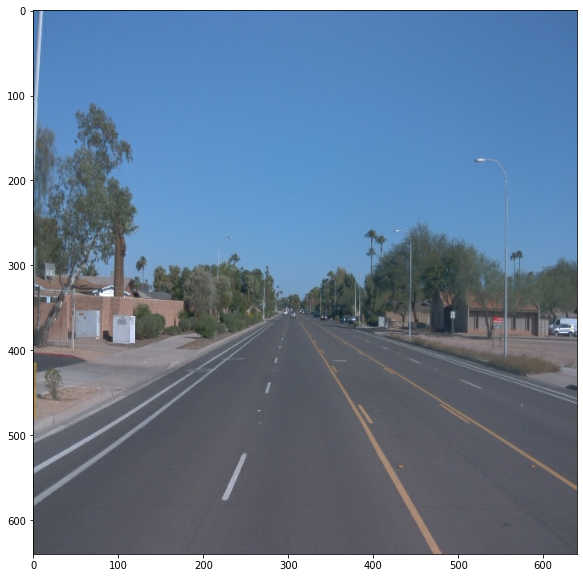

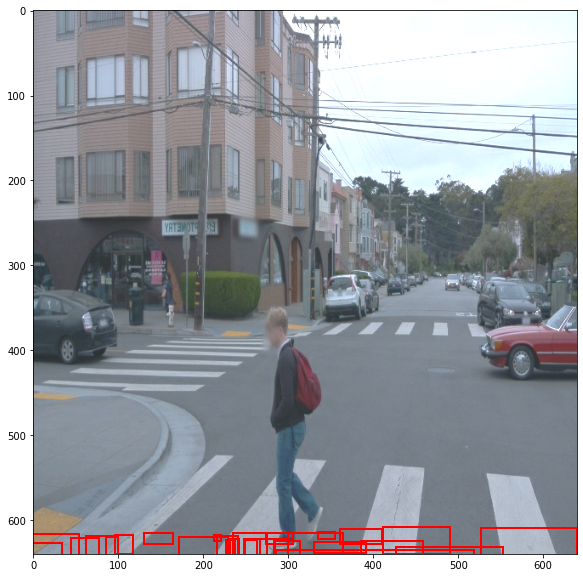

In [7]:
%matplotlib inline

for batch in train_dataset.take(1):
    display_batch(batch)

In [8]:
batched_images = batch[0]['image'].numpy()
batched_bboxes = batch[1]['groundtruth_boxes'].numpy()
batched_classes = batch[1]['groundtruth_classes'].numpy()
num_bboxes = batch[1]['num_groundtruth_boxes'].numpy()
batch_size = batched_images.shape[0]

In [10]:
pos =3
batched_bboxes[pos]

array([[ 0.9493587 ,  0.64275694,  0.9987017 ,  0.76710117],
       [ 1.0194257 , -1.9995592 ,  1.3036412 , -1.5308008 ],
       [ 0.9686025 ,  0.26775032,  1.0347221 ,  0.35854143],
       [ 0.9615848 ,  0.42849874,  0.98055446,  0.47806108],
       [ 1.0663016 ,  0.4666025 ,  1.3672937 ,  1.        ],
       [ 0.9616945 , -1.28754   ,  1.1363685 , -1.2006965 ],
       [ 0.97106963,  0.0684368 ,  1.0204126 ,  0.12104791],
       [ 0.9656419 ,  0.3373239 ,  1.0041294 ,  0.37581146],
       [ 0.96653736,  0.09609163,  1.014199  ,  0.14927238],
       [ 0.95824045,  0.52414596,  0.9720565 ,  0.55473864],
       [ 0.9620533 , -0.00273883,  1.0358883 ,  0.08284879],
       [ 0.97649735,  0.4434113 ,  1.042617  ,  0.4907806 ],
       [ 0.9602142 ,  0.46857625,  1.0371892 ,  0.57022274],
       [ 0.95112926,  0.823091  ,  1.0217768 ,  1.        ],
       [ 0.96416163,  0.14932722,  0.99968857,  0.18288046],
       [ 0.95213544, -0.2600646 ,  1.023557  , -0.11369979],
       [ 0.9730433 ,  0.

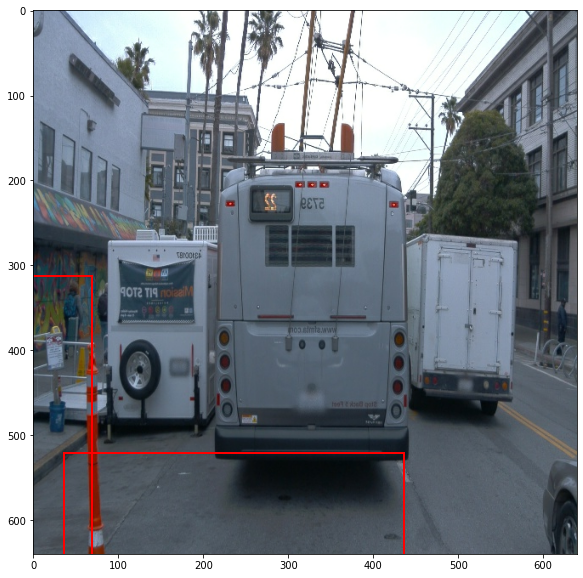

In [56]:
display_instances(batched_images[pos], batched_bboxes[pos], batched_classes[pos])

In [58]:
    w, h, _ = batched_images[pos].shape
    # resize the bboxes
    batched_bboxes[pos][:, [0, 2]] *= w
    batched_bboxes[pos][:, [1, 3]] *= h

In [59]:
batched_bboxes

array([[[ 7.0264387e-01, -1.9970920e+00,  9.2962152e-01, -1.4878726e+00],
        [ 7.7468461e-01, -1.2140191e+00,  8.2402760e-01, -1.1755314e+00],
        [ 7.0461762e-01, -1.2100716e+00,  7.4014455e-01, -1.1794789e+00],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[ 9.9376738e-01, -6.1351502e-01,  1.0135046e+00, -5.8785677e-01],
        [ 1.0381761e+00,  3.0130357e-01,  1.0658082e+00,  3.3683050e-01],
        [ 1.0307746e+00,  4.1331208e-01,  1.0771570e+00,  4.8930025e-01],
        ...,
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00]],

       [[ 1.0431104e+00, -1.1069448e+00,  1.0766636e+00, -1.0654967e+00],
        